In [3]:
import os
import numpy as np

import pandas as pd
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates

from sklearn.cluster import AgglomerativeClustering

import seaborn as sns

#matplotlib and related imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
import matplotlib.patches as patches

from scipy.spatial import ConvexHull
from scipy.signal import find_peaks
from scipy.stats import sem
import scipy.cluster.hierarchy as shc

# import squarify

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as stattools
from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.parser import parse

from IPython.display import Image

# import geopandas
# import folium
# from folium.plugins import TimeSliderChoropleth
# from branca.element import Template, MacroElement

# Plot 1: Scatter plot

In [6]:
midwest = pd.read_csv("data/midwest_filter.csv")

In [12]:
midwest.head(3)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385


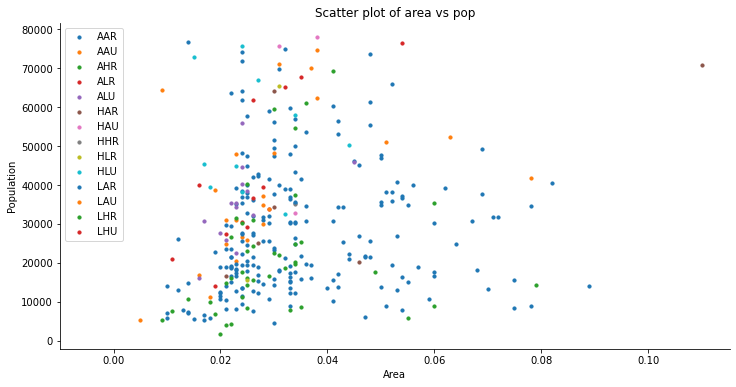

In [7]:
# instanciate the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1,1,1,)

for cat in sorted(list(midwest["category"].unique())):
    ar = midwest[midwest["category"] == cat]["area"]
    pop = midwest[midwest["category"] == cat]["poptotal"]
    
    ax.scatter(ar, pop, label = cat, s = 10)
    
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

ax.set_xlabel("Area")
ax.set_ylabel("Population")

ax.set_xlim(-0.01)
ax.set_title("Scatter plot of area vs pop")
ax.legend(loc = "best", fontsize = 10);

# Plot 2: Bubble plot with encircling

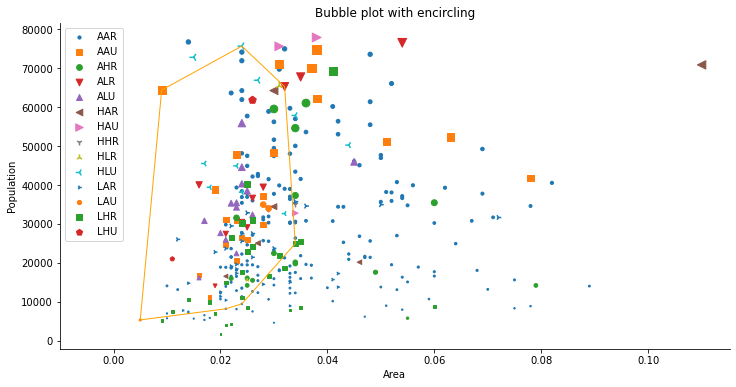

In [25]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1,1,1)

size_total = midwest["poptotal"].sum()

markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", 
           "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"]

for cat, marker in zip(sorted(list(midwest["category"].unique())), markers):
    ar = midwest[midwest["category"] == cat]["area"]
    pop = midwest[midwest["category"] == cat]["poptotal"]
    
    size = pop / size_total
    
    # plot the data
    ax.scatter(ar, pop, label = cat, s = size*10000, marker = marker);
    
encircle_data = midwest[midwest["state"] == "IN"]

encircle_x = encircle_data["area"]
encircle_y = encircle_data["poptotal"]

# concatenates over axis 1
p = np.c_[encircle_x, encircle_y]

hull = ConvexHull(p)

poly = plt.Polygon(p[hull.vertices, :], ec = "orange", fc = "none")

ax.add_patch(poly)

# prettify the plot
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

ax.set_xlabel("Area")
ax.set_ylabel("Population")

ax.set_xlim(-0.01)
ax.set_title("Bubble plot with encircling")
ax.legend(loc = "best", fontsize = 10);